In [1]:
# Package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Mission 1. Netflix

### Mandatory Part

In [5]:
netflix = pd.read_csv("C:/Users/HP/Desktop/work_on_PG/netflix_titles.csv")
netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [14]:
netflix.loc[netflix['country']=='South Korea','title']

27                              #Alive
51                  100 Days My Prince
61                    12 Years Promise
81                  2015 Dream Concert
91                            26 Years
                     ...              
7583          When the Camellia Blooms
7601                      White Nights
7711         YG Future Strategy Office
7718    Yoo Byung Jae: Discomfort Zone
7720              YooHoo to the Rescue
Name: title, Length: 183, dtype: object

Length 183으로, 총 183개의 작품이 South Korea 작품임을 알 수 있다.

### Bonus Part
물론, 그냥 group_by를 해서 세는 방법도 있을 건데, 단일 국가를 기준으로 세야 한다는 조건이 들어가있다.
따라서, data_frame에서 추출을 해서, 그것을 바탕으로 group_by를 하는 방법이 존재한다.

주의 사항은, data_frame의 복사시 copy method를 까먹으면 큰일난다! (mutable)
또한 국가에 결측치가 보인다. 결측치부터 없애자. 없으면 알 수 없으니까, 셀 수 없다.


In [29]:
nf = netflix.copy()

In [30]:
nf.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
nf.dropna(subset = ['country'], inplace = True)

In [38]:
nf.isna().sum()

show_id            0
type               0
title              0
director        2087
cast             622
country            0
date_added         9
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

country를 알 수 없는 영화들은 데이터에서 제거되었다. (나머지 결측치는 문제와 상관없어 처리하지 않는다)

In [41]:
# 먼저 문자열로 바꾸고
nf['country'] = nf['country'].astype(str)

두 국가 이상일 경우 , 로 구분이 되기에 쉼표가 없는지 확인하면 된다.
이를 loc으로 하지 말고 apply로 적용하면 된다고 한다.

In [141]:
# 배우게 된 풀이
nf = nf[nf.apply(lambda x: not x['country'].count(','), axis=1)]
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [146]:
result = nf['country'].groupby(by = nf['country']).count()
result = result.sort_values(ascending = False)
result

country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
                  ... 
Croatia              1
Cyprus               1
Namibia              1
Finland              1
Zimbabwe             1
Name: country, Length: 69, dtype: int64

예상했던 결과대로, 미국이 가장 많이 올라갔으며, 단독 작품으로 2555 작품을 올리게 되었다.

## Mission 2. 떡상 가즈아!

### Mandatory Part

문제에서 원하는 것들부터 확인해보자.  
(1) 2016년 6월 1일부터 2017년 7월 31일까지의 비트코인 데이터에 대해  
(2) 5-MA를 구하고  
(3) 이를 그래프로 표현하되, 적절한 label 이름이 필요하다.  

In [77]:
# 데이터부터 부르고 생각하자.
bitcoin = pd.read_csv("C:/Users/HP/Desktop/work_on_PG/Bitcoin.csv")
bitcoin.tail(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6722784.102,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8026718.801,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8312655.246,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7757951.030,1491160000
1608,1608,2013-04-28,135.30,135.98,132.10,134.21,7806647.629,1500520000


먼저 지금 tail만 봐도, date로 전혀 정렬되어 있지 않다. 그리고 문제에서 요구한 바는 open에 대해서만 하라고 되어있다.
따라서 data에 적절한 전처리를 해주자.

In [78]:
bitcoin = bitcoin[['Date', 'Open']]
bitcoin.tail(5)

,Date,Open
1604,2013-02-05,116.38
1605,2013-01-05,139.00
1606,2013-04-30,144.00
1607,2013-04-29,134.44
1608,2013-04-28,135.30


여기서 data의 경우, 모두 시계열로 바꿔줘야 작업이 편하다. 따라서 시계열로의 변환을 고르자.

In [79]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date']) 
bitcoin

,Date,Open
0,2017-09-22,3628.02
1,2017-09-21,3901.47
2,2017-09-20,3916.36
3,2017-09-19,4073.79
4,2017-09-18,3591.09
...,...,...
1604,2013-02-05,116.38
1605,2013-01-05,139.00
1606,2013-04-30,144.00
1607,2013-04-29,134.44


인덱싱을 위해서는, date를 index로 재지정해야 한다.

In [80]:
bitcoin.set_index('Date', drop=True, inplace=True)

In [81]:
bitcoin.tail(5)

,Open
Date,
2013-02-05,116.38
2013-01-05,139.00
2013-04-30,144.00
2013-04-29,134.44
2013-04-28,135.30


이제 날짜 기준으로 잘라보자.

In [88]:
bitcoin = bitcoin.loc['2016-06-01':'2017-06-30']
bitcoin = bitcoin.sort_index(ascending = True)

In [89]:
bitcoin

,Open
Date,
2016-06-01,431.86
2016-06-02,386.59
2016-06-03,400.52
2016-06-04,424.28
2016-06-05,447.94
...,...
2017-06-26,2590.57
2017-06-27,2478.45
2017-06-28,2553.03


데이터가 의대대로 준비 잘 되었다. 이제, 이를 복사하여, 백업해두고, 본격으로 5-ma 작업을 해보자

In [90]:
bit_ma = bitcoin.copy()

여기서, 여러가지 방법이 있는데, 검색을 통해 알아본 결과 시계열 데이터에서 이를 직접 계산하는 메서드가 존재한다.  
(참고 : https://rfriend.tistory.com/502)

In [91]:
bit_ma['ma5'] = bit_ma.Open.rolling(window=5).mean()

In [92]:
bit_ma

,Open,ma5
Date,,
2016-06-01,431.86,NaN
2016-06-02,386.59,NaN
2016-06-03,400.52,NaN
2016-06-04,424.28,NaN
2016-06-05,447.94,418.238
...,...,...
2017-06-26,2590.57,2666.942
2017-06-27,2478.45,2624.426
2017-06-28,2553.03,2593.564


In [93]:
bit_ma.isna().sum()

Open    0
ma5     4
dtype: int64

최근 5일간의 평균을 계산하는 방식이기에, 최초의 4일은 NaN으로 표기된다. 따라서 결측치를 먼저 제거한다.
이때는 행을 날리면되므로, axis = 0이다.

In [94]:
bit_ma.dropna(axis = 0, inplace = True)
bit_ma.head(5)

,Open,ma5
Date,,
2016-06-05,447.94,418.238
2016-06-06,574.60,446.786
2016-06-07,670.42,503.552
2016-06-08,575.03,538.454
2016-06-09,606.51,574.900


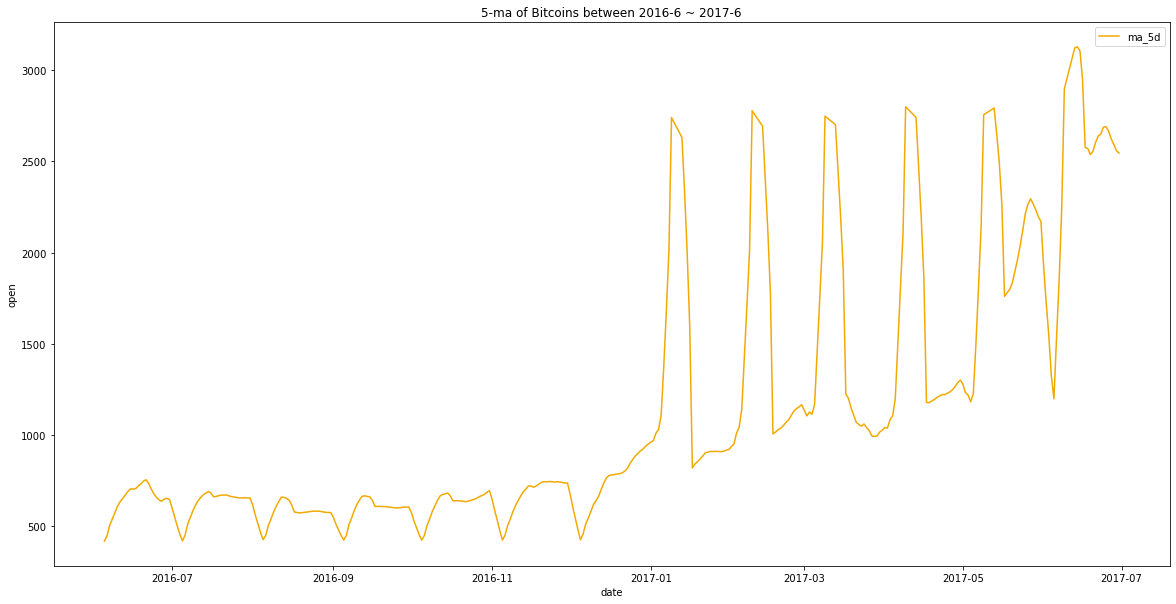

In [105]:
plt.figure(figsize = (20, 10))
plt.plot(bit_ma.index, bit_ma.ma5, label = 'ma_5d', color ='#f2a900')
plt.xlabel('date')
plt.ylabel('open')
plt.title('5-ma of Bitcoins between 2016-6 ~ 2017-6')
plt.legend()
plt.show()

나일론 마스크씨는 얼마나 후회할지는 모르겠지만, 과제를 하는 본인은 2016년에 살걸 후회하게 되는 그래프다.  
다만, 떡상과 떡락을 반복하는 예측된 모양의 그래프를 보이고 있다.

### Bonus Part

In [129]:
ethcoin = pd.read_csv("C:/Users/HP/Desktop/work_on_PG/ETH_day.csv")
ethcoin.tail(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06


In [130]:
ethcoin = ethcoin[['Date', 'Open']]
ethcoin['Date'] = pd.to_datetime(ethcoin['Date']) 
ethcoin

,Date,Open
0,2020-04-15,158.61
1,2020-04-14,156.97
2,2020-04-13,158.56
3,2020-04-12,158.66
4,2020-04-11,158.26
...,...,...
1433,2016-05-13,10.20
1434,2016-05-12,10.43
1435,2016-05-11,9.68
1436,2016-05-10,9.98


In [131]:
ethcoin.set_index('Date', drop=True, inplace=True)
ethcoin = ethcoin.sort_index(ascending = True)
ethcoin

,Open
Date,
2016-05-09,12.00
2016-05-10,9.98
2016-05-11,9.68
2016-05-12,10.43
2016-05-13,10.20
...,...
2020-04-11,158.26
2020-04-12,158.66
2020-04-13,158.56


In [132]:
ethcoin = ethcoin.loc['2016-06-01':'2017-06-30']
ethcoin

,Open
Date,
2016-06-01,14.18
2016-06-02,13.95
2016-06-03,13.90
2016-06-04,14.02
2016-06-05,13.86
...,...
2017-06-26,278.73
2017-06-27,253.00
2017-06-28,286.21


In [133]:
eth_ma = ethcoin.copy()
eth_ma['ma5'] = eth_ma.Open.rolling(window=5).mean()
eth_ma.dropna(axis = 0, inplace = True)
eth_ma.head(5)

,Open,ma5
Date,,
2016-06-05,13.86,13.982
2016-06-06,13.91,13.928
2016-06-07,14.16,13.970
2016-06-08,14.50,14.090
2016-06-09,14.51,14.188


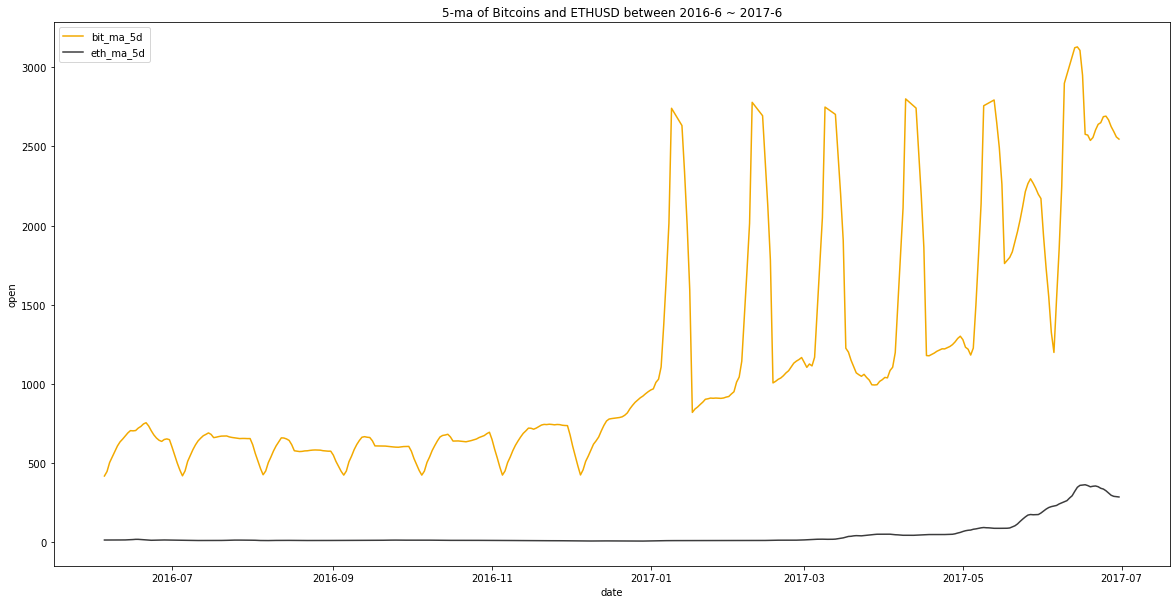

In [135]:
plt.figure(figsize = (20, 10))
plt.plot(bit_ma.index, bit_ma.ma5, label = 'bit_ma_5d', color = '#f2a900')
plt.plot(eth_ma.index, eth_ma.ma5, label = 'eth_ma_5d', color = '#3c3c3d')
plt.xlabel('date')
plt.ylabel('open')
plt.title('5-ma of Bitcoins and ETHUSD between 2016-6 ~ 2017-6')
plt.legend()
plt.show()

그래프를 통해 확인해 본 결과, 이더리움은 택도 없다! 실패!